In [1]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [3]:
#monthfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ctio_11.csv'
#yearfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ctio_AllYear.csv'

In [4]:
monthfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ohp_11.csv'
yearfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ohp_AllYear.csv'

## Per month

In [5]:
df_month=pd.read_csv(monthfile)

In [6]:
df_year=pd.read_csv(yearfile)

In [7]:
df_month.describe()

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TS,U10M,U2M,U50M,V10M,V2M,V50M
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,93774.621853,280.562093,279.869139,290.661064,0.006237,0.024694,0.076577,279.057108,-0.873470,-0.522847,-1.231734,-0.020324,0.021955,-0.088090
std,632.780589,3.988254,4.453649,22.728856,0.000487,0.050989,0.095721,5.421780,3.182245,2.116561,4.338954,3.250351,2.160979,4.634925
min,92384.640625,270.773041,269.714844,251.922699,0.005408,0.000000,0.000000,268.463745,-11.487646,-7.753606,-15.580361,-8.264384,-5.709053,-10.511650
25%,93347.462891,278.168152,276.653923,274.927795,0.005900,0.000011,0.003048,274.719315,-2.262013,-1.166809,-3.400830,-1.955248,-1.065619,-2.806863
50%,93721.386719,280.346954,279.787888,287.496506,0.006166,0.000931,0.032837,279.007690,-0.822777,-0.472520,-1.214488,-0.075527,-0.029689,-0.108816
75%,94129.212891,283.772430,283.689270,306.159142,0.006568,0.018782,0.117317,283.492989,1.405577,0.783036,2.122082,1.640904,0.975344,2.463160
max,95422.078125,289.985931,290.595459,349.622040,0.007495,0.379395,0.394043,293.283752,5.909451,4.116533,7.237700,9.439109,6.428907,12.690127


In [8]:
h2o_month=df_month["TQL"]

In [9]:
mean_h2o_m = np.mean(h2o_month)
variance_h2o_m = np.var(h2o_month)
sigma_h2o_m = np.sqrt(variance_h2o_m)

In [10]:
mean_h2o_m=np.trunc(mean_h2o_m*1000)/1000
sigma_h2o_m=np.trunc(sigma_h2o_m*1000)/1000

In [11]:
print mean_h2o_m 
print variance_h2o_m 
print sigma_h2o_m 

0.0
0.00914971157166
0.0


In [12]:
variation_m = variance_h2o_m/mean_h2o_m  
print 'monthly variation = ',variation_m

monthly variation =  inf


/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


In [13]:
title = "Monthly variation of H2O (nov 2016), mean = {} std = {}".format(mean_h2o_m ,sigma_h2o_m)

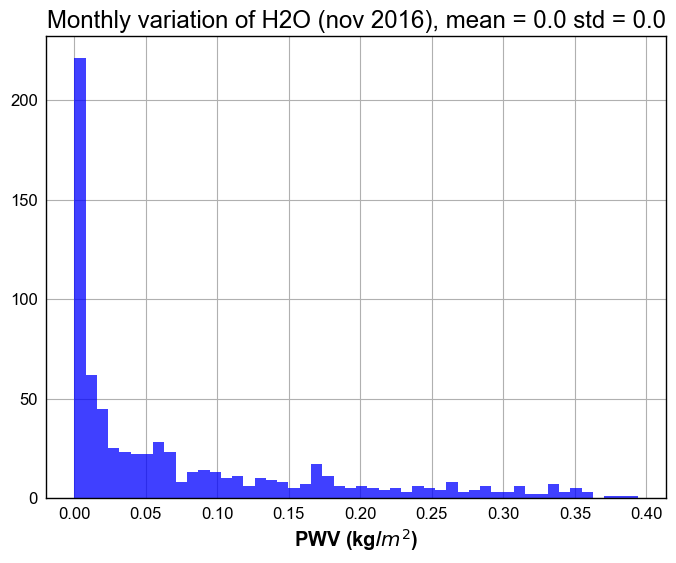

In [14]:
n, bins, patches = plt.hist(h2o_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('PWV (kg/$m^2$)')
plt.savefig('HistoH2O2016_11.pdf')

## Per year

In [15]:
df_year.describe()

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TS,U10M,U2M,U50M,V10M,V2M,V50M
count,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,93809.452543,285.935426,285.656394,321.835242,0.006906,0.017245,0.049940,285.836614,0.454081,0.372585,0.369087,-1.090322,-0.680580,-1.588893
std,653.735984,7.917667,8.510791,38.482148,0.000825,0.036884,0.073383,10.125633,2.903603,1.962077,3.838416,3.518035,2.415751,4.663361
min,91520.632812,268.880249,267.727661,223.248962,0.004786,0.000000,0.000000,265.772308,-12.615171,-8.829633,-15.850012,-13.481551,-9.406287,-16.631704
25%,93478.111328,279.608444,278.927376,293.434036,0.006295,0.000002,0.000580,277.949799,-1.292345,-0.731405,-1.912107,-2.975563,-1.808103,-4.604850
50%,93864.261719,285.173965,284.759003,314.830032,0.006755,0.001140,0.015451,284.638397,0.641289,0.380750,0.827547,-0.877536,-0.501288,-1.226699
75%,94200.462891,291.680878,291.502731,349.708511,0.007503,0.015172,0.070595,291.890465,2.421775,1.648118,3.222328,1.158678,0.686007,1.642196
max,95663.421875,305.836182,307.543945,458.936279,0.009838,0.379395,0.521729,314.343536,8.411731,5.930426,10.456000,9.439109,6.563056,12.690127


In [16]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TS,U10M,U2M,U50M,V10M,V2M,V50M
0.05,92574.650391,274.075981,273.163338,265.090863,0.005695,0.000000,0.000000,271.449785,-4.598129,-3.072688,-6.773836,-7.654765,-5.279693,-9.712290
0.10,92907.917969,276.153015,275.248370,278.535901,0.005978,0.000000,0.000000,273.558484,-2.894875,-1.710458,-4.552585,-5.958783,-4.095639,-8.102586
0.50,93864.261719,285.173965,284.759003,314.830032,0.006755,0.001140,0.015451,284.638397,0.641289,0.380750,0.827547,-0.877536,-0.501288,-1.226699
0.90,94587.218750,297.239581,297.995862,374.553598,0.008035,0.055392,0.157544,300.661566,3.988600,2.843696,4.782265,3.023747,2.147385,3.993668
0.95,94823.301953,300.444432,301.691092,388.425702,0.008332,0.100049,0.208261,305.816653,4.858291,3.480487,5.534537,4.328503,3.113887,5.507301


In [17]:
h2o_year=df_year["TQL"]

In [18]:
h2o_year.replace(to_replace=0, value=np.nan)

0       0.064331
1       0.044357
2       0.031830
3       0.020370
4       0.013981
5       0.010727
6       0.008629
7       0.008053
8       0.009148
9       0.013538
10      0.022362
11      0.045074
12      0.079132
13      0.155762
14      0.185974
15      0.194641
16      0.200989
17      0.202087
18      0.239136
19      0.275513
20      0.302124
21      0.319702
22      0.300415
23      0.294922
24      0.308228
25      0.301147
26      0.318481
27      0.344604
28      0.374023
29      0.410156
          ...   
8010    0.096283
8011    0.104248
8012    0.116943
8013    0.128784
8014    0.128052
8015    0.112823
8016    0.095978
8017    0.082489
8018    0.069183
8019    0.057266
8020    0.047226
8021    0.049194
8022    0.047119
8023    0.035324
8024    0.027496
8025    0.017677
8026    0.005857
8027    0.004829
8028    0.005142
8029    0.004919
8030    0.002925
8031    0.002123
8032    0.001038
8033    0.000540
8034    0.000241
8035    0.000093
8036    0.000106
8037    0.0011

In [25]:
np.mean(h2o_year)

0.049939860283865926

In [24]:
mean_h2o_y = np.mean(h2o_year)
variance_h2o_y = np.var(h2o_year)
sigma_h2o_y = np.sqrt(variance_h2o_y)

In [26]:
mean_h2o_y=np.trunc(mean_h2o_y*1000)/1000
sigma_h2o_y=np.trunc(sigma_h2o_y*1000)/1000

In [27]:
print mean_h2o_y 
print variance_h2o_y 
print sigma_h2o_y 

0.049
0.00538436364588
0.073


In [28]:
title = "Yearly variation of H2O (year 2016), mean = {} std = {}".format(mean_h2o_y ,sigma_h2o_y)

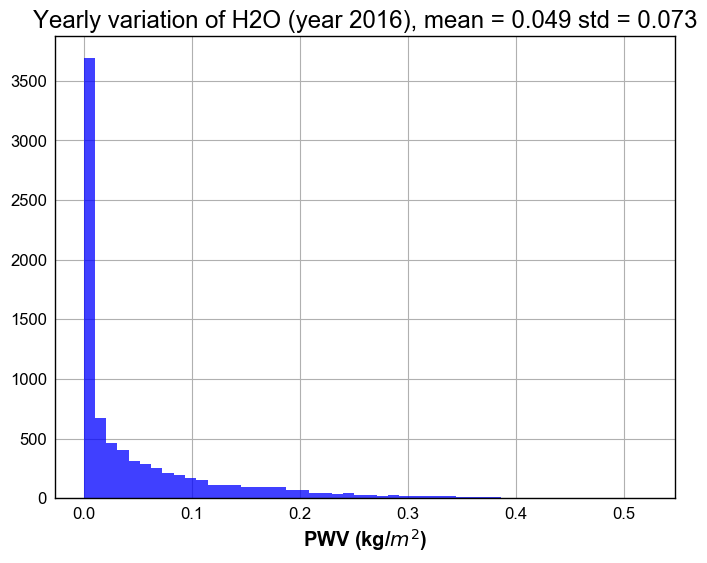

In [29]:
n, bins, patches = plt.hist(h2o_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('PWV (kg/$m^2$)')
plt.savefig('HistoH2O2016_allyear.pdf')